# LOGISTIC REGRESSION

# Collecting Data

import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
titanic_data = pd.read_csv("D:\\pa\\titanic1.csv")
titanic_data.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C


In [3]:
titanic_data.describe()

,pclass,survived,age,sibsp,parch,fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


# Analyzing data

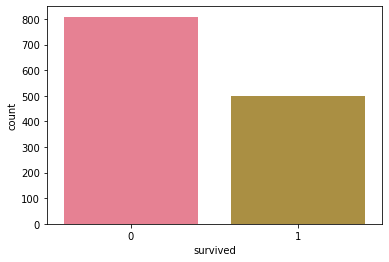

In [4]:
 sns.countplot(x ='survived', data=titanic_data)

survived vs not survived

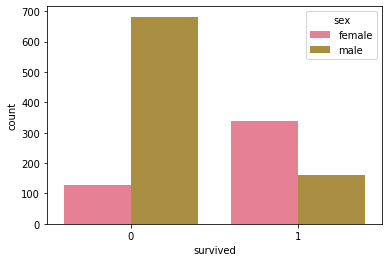

In [5]:
 sns.countplot(x ='survived', hue='sex' ,data=titanic_data)

male survived vs female survived

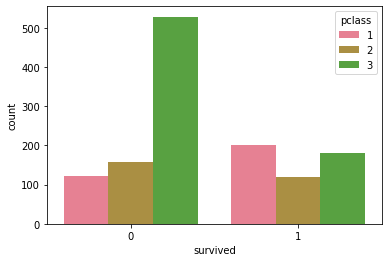

In [6]:
  sns.countplot(x ='survived', hue='pclass' ,data=titanic_data)

acoording passenger class
class 1  , class 2  ,class 3 survived VS 
class 1  , class 2  ,class 3 NOT survived


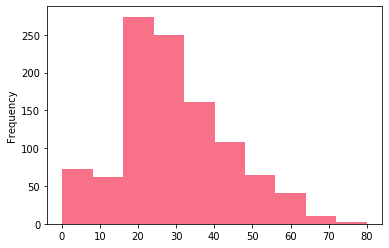

In [7]:
titanic_data["age"].plot.hist()

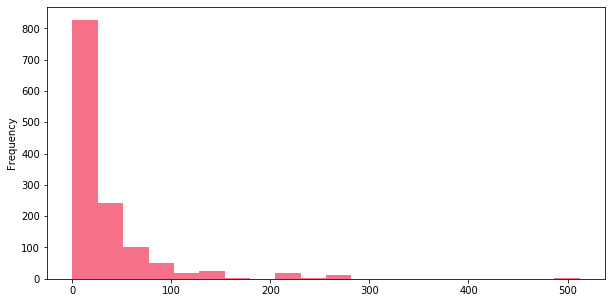

In [8]:
titanic_data["fare"].plot.hist(bins=20, figsize=(10,5))

In [9]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
pclass      1309 non-null int64
survived    1309 non-null int64
name        1309 non-null object
sex         1309 non-null object
age         1046 non-null float64
sibsp       1309 non-null int64
parch       1309 non-null int64
ticket      1309 non-null object
fare        1308 non-null float64
cabin       295 non-null object
embarked    1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


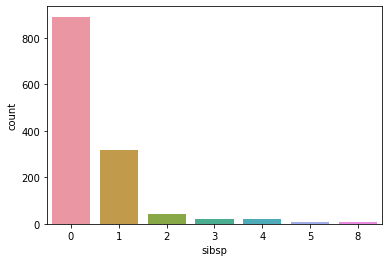

In [10]:
  sns.countplot(x ='sibsp' ,data=titanic_data)

# Data Wrangling

In [11]:
titanic_data.isnull().sum()

pclass         0
survived       0
name           0
sex            0
age          263
sibsp          0
parch          0
ticket         0
fare           1
cabin       1014
embarked       2
dtype: int64

In [12]:
n=titanic_data['age'].mean()
titanic_data['age'].fillna(n,inplace=True)

f=titanic_data['fare'].mean()
titanic_data['fare'].fillna(f,inplace=True)

titanic_data['cabin'].value_counts()
titanic_data['cabin'].fillna('G6',inplace=True)

titanic_data['embarked'].value_counts()
titanic_data['embarked'].fillna('S',inplace=True)

titanic_data.isnull().sum()

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
cabin       0
embarked    0
dtype: int64

In [13]:
titanic_data.drop("cabin", axis=1 , inplace=True)
titanic_data.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S


In [14]:
sex = pd.get_dummies(titanic_data['sex'])
sex.head()

,female,male
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0


In [15]:
embarked = pd.get_dummies(titanic_data['embarked'])
embarked.head()

,C,Q,S
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [16]:
pclass = pd.get_dummies(titanic_data['pclass'])
pclass.head()

,1,2,3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [17]:
titanic_data = pd.concat([titanic_data,sex,embarked,pclass],axis=1)
titanic_data.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,female,male,C,Q,S,1,2,3
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,1,0,0,0,1,1,0,0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,0,1,0,0,1,1,0,0
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,1,0,0,0,1,1,0,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,0,1,0,0,1,1,0,0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,1,0,0,0,1,1,0,0


In [18]:
titanic_data.drop(['sex','embarked','name','ticket','pclass'],axis=1,inplace=True)
titanic_data.head()

,survived,age,sibsp,parch,fare,female,male,C,Q,S,1,2,3
0,1,29.0000,0,0,211.3375,1,0,0,0,1,1,0,0
1,1,0.9167,1,2,151.5500,0,1,0,0,1,1,0,0
2,0,2.0000,1,2,151.5500,1,0,0,0,1,1,0,0
3,0,30.0000,1,2,151.5500,0,1,0,0,1,1,0,0
4,0,25.0000,1,2,151.5500,1,0,0,0,1,1,0,0


# Train And Test Data

In [19]:
X = titanic_data.drop("survived",axis=1)
Y = titanic_data[['survived']]


In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=0)


In [21]:

logmodel = LogisticRegression()
logmodel.fit(X_train,Y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
predictions = logmodel.predict(X_test)

In [23]:
from sklearn.metrics import classification_report


In [24]:
classification_report(Y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.82      0.87      0.84       246\n           1       0.76      0.67      0.71       147\n\n    accuracy                           0.80       393\n   macro avg       0.79      0.77      0.78       393\nweighted avg       0.79      0.80      0.79       393\n'

In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
confusion_matrix(Y_test,predictions)

array([[214,  32],
       [ 48,  99]], dtype=int64)

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
accuracy_score(Y_test,predictions)

0.7964376590330788